<a href="https://colab.research.google.com/github/hafizhabdurrahman/Tesis/blob/main/SwiftIDS_Coba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import dari drive
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import lightgbm as lgb
import pandas as pd
#import matplotlib.pyplot as plt

# GPU

In [ ]:
! git clone --recursive https://github.com/Microsoft/LightGBM

Cloning into 'LightGBM'...
remote: Enumerating objects: 22468, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 22468 (delta 32), reused 25 (delta 12), pack-reused 22398
Receiving objects: 100% (22468/22468), 17.35 MiB | 14.21 MiB/s, done.
Resolving deltas: 100% (16490/16490), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21731, done.        
remote: Counting objects: 100% (3/3), done.        
remote: Compressi

In [ ]:
! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu; 

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "2.2") 
-- OpenCL include directory: /usr/include
-- Boost version: 1.65.1
-- Found the following Boost libraries:
--

# Multiclass data


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/dataset/KDDCUP99/kddcup99_csv.csv')
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [4]:
print('Null values in dataset are',len(data[data.isnull().any(1)]))

Null values in dataset are 0


In [5]:
data.shape

(494020, 42)

In [6]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [7]:
data_clean = data.drop_duplicates(subset=data.columns, keep='first')
data_clean.shape

(145585, 42)

In [8]:
data_clean["protocol_type"] =data_clean["protocol_type"].astype('category')
data_clean["service"] = data_clean["service"].astype('category')
data_clean["flag"] = data_clean["flag"].astype('category')
data_clean["label"] = data_clean["label"].astype('category')
data_clean.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

duration                          int64
protocol_type                  category
service                        category
flag                           category
src_bytes                         int64
dst_bytes                         int64
land                              int64
wrong_fragment                    int64
urgent                            int64
hot                               int64
num_failed_logins                 int64
logged_in                         int64
lnum_compromised                  int64
lroot_shell                       int64
lsu_attempted                     int64
lnum_root                         int64
lnum_file_creations               int64
lnum_shells                       int64
lnum_access_files                 int64
lnum_outbound_cmds                int64
is_host_login                     int64
is_guest_login                    int64
count                             int64
srv_count                         int64
serror_rate                     float64


In [9]:
dict_service = dict(enumerate(data_clean["service"].cat.categories))
dict_protocol_type = dict(enumerate(data_clean["protocol_type"].cat.categories))
#dict_label = dict(enumerate(data_clean["label"].cat.categories))
dict_flag = dict(enumerate(data_clean["flag"].cat.categories))

In [10]:
data_clean["protocol_type"] =data_clean["protocol_type"].cat.codes
data_clean["service"] = data_clean["service"].cat.codes
data_clean["flag"] = data_clean["flag"].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [11]:
dict_label = {
    0:"normal",
    1:"dos",
    2:"probe",
    3:"r2l",
    4:"u2r"
}

In [12]:
dict_label

{0: 'normal', 1: 'dos', 2: 'probe', 3: 'r2l', 4: 'u2r'}

In [13]:
data_clean["label"] = data_clean["label"].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
temp = []
j = 0
k = 0
for i in data_clean["label"]:
    if i == 11:
      i = 0
    elif (i == 0) or (i == 6)or (i == 9) or (i==14) or (i ==18) or (i==20):
      i = 1
    elif (i == 5) or (i == 10)or (i == 15) or (i==17):
      i = 2
    elif (i == 1) or (i == 7)or (i == 12) or (i==16):
      i = 4
    else:
      i = 3
    temp.append(i)

In [15]:
data_clean.drop(columns=["label"], inplace=True)
data_clean["label"] = temp

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
data_clean["label"]

0         0
1         0
2         0
3         0
4         0
         ..
494015    0
494016    0
494017    0
494018    0
494019    0
Name: label, Length: 145585, dtype: int64

In [17]:
data_clean["protocol_type"] =data_clean["protocol_type"].astype('int')
data_clean["service"] = data_clean["service"].astype('int')
data_clean["flag"] = data_clean["flag"].astype('int')
data_clean["label"] = data_clean["label"].astype('int')
data_clean.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
#data_clean["protocol_type"] =data_clean["protocol_type"].astype('string')
#data_clean["service"] = data_clean["service"].astype('string')
#data_clean["flag"] = data_clean["flag"].astype('string')

In [18]:
data_clean["label"]

0         0
1         0
2         0
3         0
4         0
         ..
494015    0
494016    0
494017    0
494018    0
494019    0
Name: label, Length: 145585, dtype: int64

In [19]:
X = data_clean.drop(columns=["label"])
Y = data_clean["label"]


In [20]:
#nama = data_clean.drop(columns=["label", "protocol_type", "service", "flag"])
nama2 = data_clean.drop(columns=["label"])

In [21]:
fitur = []
for i in nama2.columns:
  fitur.append(i)
fitur

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'lnum_compromised',
 'lroot_shell',
 'lsu_attempted',
 'lnum_root',
 'lnum_file_creations',
 'lnum_shells',
 'lnum_access_files',
 'lnum_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)

(101909, 41)
(43676, 41)


In [23]:
#frame = {"protocol_type": data["protocol_type"], 
#         'service': data["service"], 
#         "flag": data["flag"]}
#data_cat = pd.DataFrame(frame)
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
361408,0,1,45,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,5,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,11,0.04,0.07,0.00,0.00,1.00,1.0,0.0,0.0
85540,0,1,22,9,151,3836,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,7,225,1.00,0.00,0.14,0.01,0.00,0.0,0.0,0.0
37646,0,1,22,9,209,339,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,14,0.0,0.0,0.0,0.0,1.00,0.00,0.21,32,255,1.00,0.00,0.03,0.02,0.00,0.0,0.0,0.0
86362,25,1,18,9,328,1072,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,91,29,0.32,0.07,0.01,0.00,0.01,0.0,0.0,0.0
90841,0,1,22,9,216,3750,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.00,0.00,111,255,1.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451859,0,1,19,9,194,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,186,44,0.24,0.03,0.24,0.00,0.00,0.0,0.0,0.0
455951,0,1,19,9,748,0,0,0,0,0,0,1,0,0,0,9,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,205,35,0.17,0.02,0.17,0.00,0.00,0.0,0.0,0.0
24215,0,1,22,9,162,10529,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.00,0.00,0.00,37,255,1.00,0.00,0.03,0.04,0.00,0.0,0.0,0.0
22379,0,1,22,9,216,767,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0


In [ ]:
lgbm_train = lgb.Dataset(X_train, Y_train, free_raw_data=False)#, feature_name=fitur, categorical_feature=["protocol_type", "service", "flag"])

In [ ]:
lgbm_train.construct()

In [ ]:
lgbm_train.set_categorical_feature(["protocol_type", "service", "flag"])
lgbm_train.construct()

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['flag', 'protocol_type', 'service']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


In [ ]:
lgbm_train.set_feature_name(fitur)
lgbm_train.construct()

In [ ]:
lgbm_train.get_data()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
361408,0,1,45,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,5,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,11,0.04,0.07,0.00,0.00,1.00,1.0,0.0,0.0
85540,0,1,22,9,151,3836,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,7,225,1.00,0.00,0.14,0.01,0.00,0.0,0.0,0.0
37646,0,1,22,9,209,339,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,14,0.0,0.0,0.0,0.0,1.00,0.00,0.21,32,255,1.00,0.00,0.03,0.02,0.00,0.0,0.0,0.0
86362,25,1,18,9,328,1072,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,91,29,0.32,0.07,0.01,0.00,0.01,0.0,0.0,0.0
90841,0,1,22,9,216,3750,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.00,0.00,111,255,1.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451859,0,1,19,9,194,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,186,44,0.24,0.03,0.24,0.00,0.00,0.0,0.0,0.0
455951,0,1,19,9,748,0,0,0,0,0,0,1,0,0,0,9,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,205,35,0.17,0.02,0.17,0.00,0.00,0.0,0.0,0.0
24215,0,1,22,9,162,10529,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.00,0.00,0.00,37,255,1.00,0.00,0.03,0.04,0.00,0.0,0.0,0.0
22379,0,1,22,9,216,767,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0


In [ ]:
parameters = {
    #"num_leaves":8,
    "n_estimators": 3,
    "max_depth":3,
    "random_state": 43
}

In [ ]:
model = lgb.train(parameters,train_set = lgbm_train)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [39]:
clf = lgb.LGBMClassifier(boosting_type="goss", 
                         n_estimators =  10, 
                         max_depth = 3,
                         learning_rate = 0.45,
                         num_leaves=3,
                         silent=False,
                         random_state = 43, 
                         objective="multiclass")


In [32]:
###BACKUP
clf = lgb.LGBMClassifier(#boosting_type="goss", 
                         #n_estimators =  3, 
                         #max_depth = 3, 

                         random_state = 43, 
                         objective="multiclass")

In [40]:
model2 = clf.fit(X_train, Y_train, feature_name=fitur, categorical_feature=["protocol_type", "service", "flag"])

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['flag', 'protocol_type', 'service']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


In [41]:
#pred = model.predict(X_test, raw_score=True)
pred2 = model2.predict(X_test)

In [ ]:
#pred2_prob = model2.predict_proba(X_test)

In [ ]:
#pred2_prob_raw = model2.predict_proba(X_test, raw_score=True)

In [42]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

precision = precision_score(Y_test, pred2, average="weighted")
acc = accuracy_score(Y_test, pred2)
report = classification_report(Y_test, pred2)

print("Precision  =",precision)
print("Accuracy   =",acc)
print("")
print(report)

Precision  = 0.9654484079975558
Accuracy   = 0.9719754556278047

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26384
           1       0.99      0.97      0.98     16344
           2       0.69      0.57      0.62       625
           3       0.04      0.00      0.01       302
           4       0.12      0.05      0.07        21

    accuracy                           0.97     43676
   macro avg       0.56      0.52      0.53     43676
weighted avg       0.97      0.97      0.97     43676



In [43]:
from sklearn.metrics import multilabel_confusion_matrix

multi_cm = multilabel_confusion_matrix(Y_test, pred2, labels=clf.classes_)
print(multi_cm)

[[[16372   920]
  [   77 26307]]

 [[27218   114]
  [  556 15788]]

 [[42895   156]
  [  270   355]]

 [[43347    27]
  [  301     1]]

 [[43648     7]
  [   20     1]]]


In [44]:
normal_cm = multi_cm[0,]
dos_cm    = multi_cm[1,]
probe_cm  = multi_cm[2,]
r2l_cm    = multi_cm[3,]
u2r_cm    = multi_cm[4,]

In [45]:
i = 0
for i in range(0,5):
  tn, fp, fn, tp = multi_cm[i,].ravel()
  acc = (tp + tn)/(tn + fp + fn + tp)
  tpr = (tp) / (tp + fn)
  fpr = (fp) / (fp + tn)
  if i == 0:
    print("Akurasi Normal =",acc)
    print("TPR Normal     =",tpr)
    print("FPR Normal     =",fpr)
  elif i == 1:
    print("Akurasi Dos =",acc)
    print("TPR Dos     =",tpr)
    print("FPR Dos     =",fpr)
  elif i == 2:
    print("Akurasi Probe =",acc)
    print("TPR Probe     =",tpr)
    print("FPR Probe     =",fpr)
  elif i == 3:
    print("Akurasi R2L =",acc)
    print("TPR R2L     =",tpr)
    print("FPR R2L     =",fpr)
  elif i == 4:
    print("Akurasi U2R =",acc)
    print("TPR U2R     =",tpr)
    print("FPR U2R     =",fpr)
  print("")

Akurasi Normal = 0.9771728180236285
TPR Normal     = 0.9970815645845967
FPR Normal     = 0.053203793661808926

Akurasi Dos = 0.984659767377965
TPR Dos     = 0.9659813999021047
FPR Dos     = 0.00417093516756915

Akurasi Probe = 0.990246359556736
TPR Probe     = 0.568
FPR Probe     = 0.00362360920768391

Akurasi R2L = 0.9924901547760784
TPR R2L     = 0.0033112582781456954
FPR R2L     = 0.0006224927375847282

Akurasi U2R = 0.9993818115212015
TPR U2R     = 0.047619047619047616
FPR U2R     = 0.00016034818462948115



In [ ]:
clf.feature_importances_

array([ 791,  299,  254,   74, 1989,  931,    0,  170,    0,  358,   45,
         99,   86,   61,    0,  100,  223,    3,   87,    0,    0,   15,
        985,  633,  176,   82,  183,   72,  405,  460,  178,  873, 1271,
        637,  781,  752,  697,  347,  195,  485,  203])

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, pred2, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

In [ ]:
cm

array([[26052,   116,    56,   133,    27],
       [   54, 16229,    28,    24,     9],
       [   67,    25,   520,     7,     6],
       [   47,    12,     2,   237,     4],
       [    6,     0,     3,     4,     8]])

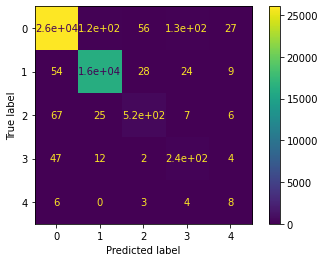

In [ ]:
disp.plot()

In [ ]:
dict_label

{0: 'back',
 1: 'buffer_overflow',
 2: 'ftp_write',
 3: 'guess_passwd',
 4: 'imap',
 5: 'ipsweep',
 6: 'land',
 7: 'loadmodule',
 8: 'multihop',
 9: 'neptune',
 10: 'nmap',
 11: 'normal',
 12: 'perl',
 13: 'phf',
 14: 'pod',
 15: 'portsweep',
 16: 'rootkit',
 17: 'satan',
 18: 'smurf',
 19: 'spy',
 20: 'teardrop',
 21: 'warezclient',
 22: 'warezmaster'}

In [ ]:
df_tree = model.trees_to_dataframe()

AttributeError: ignored

In [ ]:
df_tree

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S3,0-S1,None,same_srv_rate,86389.796875,0.315,<=,left,None,10.389200,0,101909
1,0,2,0-S3,0-S6,0-S5,0-S0,dst_host_diff_srv_rate,35398.500000,0.155,<=,left,None,10.266300,36635,36635
2,0,3,0-S6,0-L0,0-L7,0-S3,src_bytes,800.836975,1e-35,<=,left,None,10.251400,35819,35819
3,0,4,0-L0,None,None,0-S6,None,NaN,None,None,None,None,10.250503,35683,35683
4,0,4,0-L7,None,None,0-S6,None,NaN,None,None,None,None,10.493627,136,136
5,0,3,0-S5,0-L4,0-L6,0-S3,src_bytes,4481.669922,46.5,<=,left,None,10.917500,816,816
6,0,4,0-L4,None,None,0-S5,None,NaN,None,None,None,None,11.035061,652,652
7,0,4,0-L6,None,None,0-S5,None,NaN,None,None,None,None,10.450245,164,164
8,0,2,0-S1,0-S2,0-S4,0-S0,lnum_compromised,70943.000000,1e-35,<=,left,None,10.458100,65274,65274
9,0,3,0-S2,0-L1,0-L3,0-S1,wrong_fragment,50309.199219,2,<=,left,None,10.468700,64607,64607


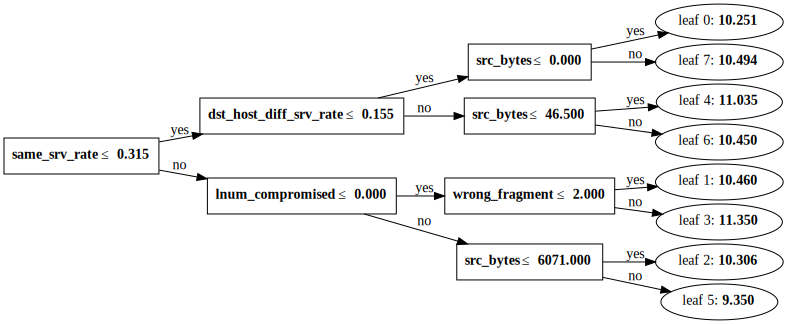

In [ ]:
lgb.create_tree_digraph(model, tree_index=0)

In [ ]:
model.get_leaf_output(0, 0)

7.186699899800442

In [ ]:
Y_train

361408    5
85540     9
37646     9
86362     9
90841     9
         ..
451859    9
455951    9
24215     9
22379     9
39552     9
Name: label, Length: 101909, dtype: int8

# Binary data



In [ ]:
data2 = pd.read_csv('/content/gdrive/MyDrive/dataset/KDDCUP99/kddcup99_csv.csv')
data2.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [ ]:
data_clean2 = data2.drop_duplicates(subset=data2.columns, keep='first')
data_clean2.shape

(145585, 42)

In [ ]:
data_clean2["protocol_type"] =data_clean2["protocol_type"].astype('category')
data_clean2["service"] = data_clean2["service"].astype('category')
data_clean2["flag"] = data_clean2["flag"].astype('category')
data_clean2["label"] = data_clean2["label"].astype('category')
data_clean.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
data_clean2["label"].cat.categories

Index(['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap',
       'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap',
       'normal', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan',
       'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster'],
      dtype='object')

In [ ]:
dict_service2 = dict(enumerate(data_clean2["service"].cat.categories))
dict_protocol_type2 = dict(enumerate(data_clean2["protocol_type"].cat.categories))
dict_label2 = {
    0:"normal",
    1:"attack",
}
dict_flag2 = dict(enumerate(data_clean2["flag"].cat.categories))

In [ ]:
data_clean2["protocol_type"] =data_clean2["protocol_type"].cat.codes
data_clean2["service"] = data_clean2["service"].cat.codes
data_clean2["flag"] = data_clean2["flag"].cat.codes
data_clean2["label"] = data_clean2["label"].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data_clean2["protocol_type"] =data_clean2["protocol_type"].astype('int')
data_clean2["service"] = data_clean2["service"].astype('int')
data_clean2["flag"] = data_clean2["flag"].astype('int')
data_clean2["label"] = data_clean2["label"].astype('int')
data_clean2.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
temp = []
j = 0
k = 0
for i in data_clean2["label"]:
    if i == 11:
      i = 0
      k = k + 1
    else:
      i = 1
      j = j + 1
    temp.append(i)
#temp

In [ ]:
data_clean2.drop(columns=["label"], inplace=True)
data_clean2["label"] = temp

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_clean2["label"]

0         0
1         0
2         0
3         0
4         0
         ..
494015    0
494016    0
494017    0
494018    0
494019    0
Name: label, Length: 145585, dtype: int64

In [ ]:
dict_label2

{0: 'normal', 1: 'attack'}

In [ ]:
X2 = data_clean2.drop(columns=["label"])
Y2 = data_clean2["label"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.3, random_state = 5)
print(X_train2.shape)
print(X_test2.shape)

(101909, 41)
(43676, 41)


In [ ]:
clf2 = lgb.LGBMClassifier(boosting_type="goss", 
                          #n_estimators =  3, 
                          num_leaves = 8, 
                          max_depth = 3, 
                          random_state = 43, 
                          objective="binary",
                          silent=False)

In [ ]:
model3 = clf2.fit(X_train2, Y_train2, feature_name=fitur, categorical_feature=["protocol_type", "service", "flag"])

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['flag', 'protocol_type', 'service']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


In [ ]:
pred3 = model3.predict(X_test2)

In [ ]:
pred3_prob = model3.predict_proba(X_test2)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

auc = roc_auc_score(Y_test2, pred3)
precision = precision_score(Y_test2, pred3)
recall = recall_score(Y_test2, pred3)
fmeasure = f1_score(Y_test2, pred3)

print("Precision  =",precision)
print("ROC AUC    =",auc)
print("Recall     =",recall)
print("F-Measure  =",fmeasure)

Precision  = 0.9991888290167449
ROC AUC    = 0.9983756777427126
Recall     = 0.9972819801064076
F-Measure  = 0.9982344939364997


In [ ]:
dict_label

{0: 'back',
 1: 'buffer_overflow',
 2: 'ftp_write',
 3: 'guess_passwd',
 4: 'imap',
 5: 'ipsweep',
 6: 'land',
 7: 'loadmodule',
 8: 'multihop',
 9: 'neptune',
 10: 'nmap',
 11: 'normal',
 12: 'perl',
 13: 'phf',
 14: 'pod',
 15: 'portsweep',
 16: 'rootkit',
 17: 'satan',
 18: 'smurf',
 19: 'spy',
 20: 'teardrop',
 21: 'warezclient',
 22: 'warezmaster'}

# CICIDS2017_Binary


## Import

In [3]:
data2 = pd.read_csv('/content/gdrive/MyDrive/dataset/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
data3 = pd.read_csv('/content/gdrive/MyDrive/dataset/CICIDS2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data4 = pd.read_csv('/content/gdrive/MyDrive/dataset/CICIDS2017/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data5 = pd.read_csv('/content/gdrive/MyDrive/dataset/CICIDS2017/Monday-WorkingHours.pcap_ISCX.csv')
data6 = pd.read_csv('/content/gdrive/MyDrive/dataset/CICIDS2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data7 = pd.read_csv('/content/gdrive/MyDrive/dataset/CICIDS2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data8 = pd.read_csv('/content/gdrive/MyDrive/dataset/CICIDS2017/Tuesday-WorkingHours.pcap_ISCX.csv')
data9 = pd.read_csv('/content/gdrive/MyDrive/dataset/CICIDS2017/Wednesday-workingHours.pcap_ISCX.csv')

In [4]:
cicid = pd.concat([data2, data3, data4, data5, data6, data7, data8, data9])
cicid.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,9174.311927,9174.311927,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,19230.769230,19230.769230,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,29411.764710,29411.764710,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,31.0,329.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [5]:
cicid.shape

(2828874, 79)

## preprocessing

### Cleaning

In [6]:
print('Null values in dataset are',len(cicid[cicid.isnull().any(1)]))

Null values in dataset are 1359


In [7]:
cicid.dropna(how="any", inplace=True)
print('Null values in dataset are',len(cicid[cicid.isnull().any(1)]))

Null values in dataset are 0


In [8]:
cicid.shape

(2827515, 79)

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(cicid.dtypes)

 Destination Port                 int64
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets       int64
 Total Length of Bwd Packets      int64
 Fwd Packet Length Max            int64
 Fwd Packet Length Min            int64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max             int64
 Bwd Packet Length Min            int64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    float64
 Flow Packets/s                 float64
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                     int64
 Flow IAT Min                     int64
Fwd IAT Total                     int64
 Fwd IAT Mean                   float64
 Fwd IAT Std                    float64
 Fwd IAT Max                      int64
 Fwd IAT Min                    float64


In [10]:
cicid.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,9174.311927,9174.311927,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,19230.769230,19230.769230,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,29411.764710,29411.764710,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,31.0,329.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [11]:
cicid.loc[(cicid[" Label"] != 'BENIGN'),' Label']= 1
cicid.loc[(cicid[" Label"] == 'BENIGN'),' Label']= 0

In [12]:
cicid[" Label"].unique()

array([0, 1], dtype=object)

In [13]:
cicid.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,9174.311927,9174.311927,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,19230.769230,19230.769230,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,29411.764710,29411.764710,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,31.0,329.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [14]:
cicid[" Destination Port"] = pd.Categorical(cicid[" Destination Port"])
cicid.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,9174.311927,9174.311927,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,19230.769230,19230.769230,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,29411.764710,29411.764710,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,31.0,329.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
for x in cicid:
  a = cicid[x].value_counts()
  print(a)
  print("="*20)

53       956842
80       617897
443      505443
123       23878
22        16937
          ...  
14816         1
14815         1
14810         1
14809         1
65535         1
Name:  Destination Port, Length: 53800, dtype: int64
3            90157
4            50877
1            29219
49           25855
48           24271
             ...  
117835564        1
11536            1
54543            1
52492            1
82753064         1
Name:  Flow Duration, Length: 1050780, dtype: int64
2      1070767
1       700485
3       204030
4       126788
5        87849
        ...   
894          1
893          1
892          1
891          1
622          1
Name:  Total Fwd Packets, Length: 1432, dtype: int64
1         793163
2         769611
0         452270
6         148761
5         109194
           ...  
2502           1
5268           1
1174           1
189636         1
6137           1
Name:  Total Backward Packets, Length: 1747, dtype: int64
0        447485
12       145688
6        111880

In [16]:
cicid.shape

(2827515, 79)

In [17]:
cicid.dtypes

 Destination Port              category
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets       int64
                                 ...   
Idle Mean                       float64
 Idle Std                       float64
 Idle Max                       float64
 Idle Min                       float64
 Label                           object
Length: 79, dtype: object

### Data split




In [18]:
X = cicid.drop(columns=[" Label"])
Y = cicid[" Label"]

In [19]:
Y = pd.Categorical(Y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 5)#, shuffle=False)
print(X_train.shape)
print(X_test.shape)

(1696509, 78)
(1131006, 78)


In [21]:
X_train.shape

(1696509, 78)

### Training


In [22]:
parameters = {
    #"num_leaves":8,
    "n_estimators": 3,
    "max_depth":3,
    "random_state": 43
}

In [91]:
clf = lgb.LGBMClassifier(boosting_type="goss", 
                         n_estimators =  10, 
                         max_depth = 3,
                         learning_rate = 0.45,
                         num_leaves=3,
                         silent=False,
                         random_state = 43, 
                         objective="binary")

In [63]:
import time
data2 = 12
data3 = 12
data4 = 12
data5 = 12
data6 = 12
data7 = 12
data8 = 12
data9 = 12

In [100]:
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 10.386777639389038s


In [92]:
evall={}
start = time.time()
clf.fit(X_train, Y_train, 
        eval_set=[(X_test, Y_test), (X_train, Y_train)], 
        eval_names=["Test", "Train"],
        verbose=10, 
        callbacks= [lgb.record_evaluation(evall)
                    #,lgb.early_stopping(20)
                    ])
stop = time.time()
print(f"Training time: {stop - start}s")

[10]	Train's binary_logloss: 0.0944273	Test's binary_logloss: 0.0945468
Training time: 16.313950777053833s


### Score


In [106]:
start = time.time()
pred = clf.predict(X_test)
stop = time.time()
print(f"Testing time: {stop - start}s")

Testing time: 2.0536510944366455s


In [102]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

precision = precision_score(Y_test, pred, average="weighted")
acc = accuracy_score(Y_test, pred)
report = classification_report(Y_test, pred)

print("Precision  =",precision)
print("Accuracy   =",acc)
print("")
print(report)

Precision  = 0.983071735872818
Accuracy   = 0.9831282946332733

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    908556
           1       0.96      0.95      0.96    222450

    accuracy                           0.98   1131006
   macro avg       0.98      0.97      0.97   1131006
weighted avg       0.98      0.98      0.98   1131006



In [103]:
from sklearn.metrics import confusion_matrix, roc_auc_score

conf = confusion_matrix(Y_test, pred)
conf

array([[900248,   8308],
       [ 10774, 211676]])

In [104]:
tn, fp, fn, tp = conf.ravel()
print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)

True Negative: 900248
False Positive: 8308
False Negative: 10774
True Positive: 211676


In [105]:
acc = (tp + tn)/(tn + fp + fn + tp)
tpr = (tp) / (tp + fn)
fpr = (fp) / (fp + tn)
auc = roc_auc_score(Y_test, pred)

print("Akurasi Normal =",acc)
print("TPR Normal     =",tpr)
print("FPR Normal     =",fpr)
print("AUC ROC        =",auc)

Akurasi Normal = 0.9831282946332733
TPR Normal     = 0.9515666441897056
FPR Normal     = 0.009144180435768406
AUC ROC        = 0.9712112318769687


In [89]:
clf.classes_

array([0, 1])

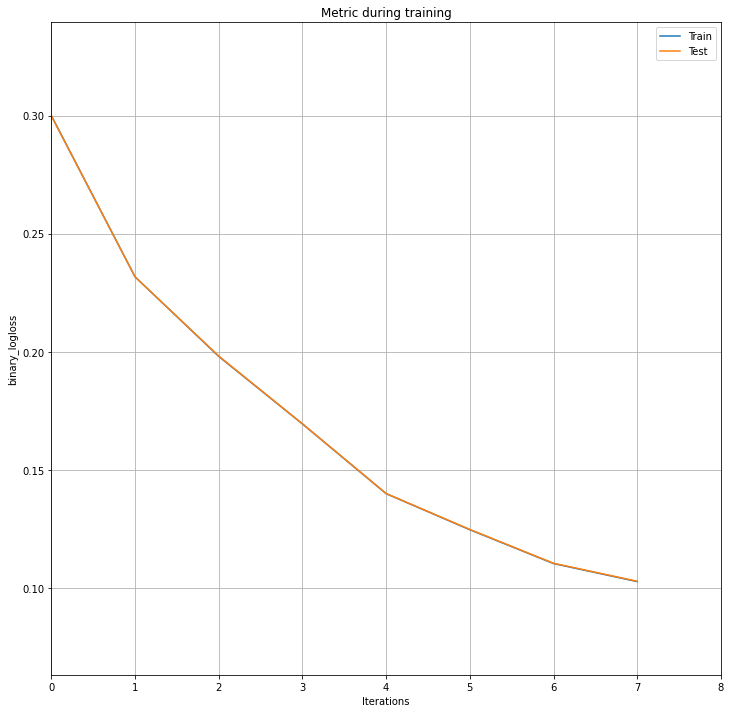

In [83]:
lgb.plot_metric(clf,figsize=(12,12))

In [ ]:
a = clf.feature_importances_
a

array([13,  4,  2,  3,  3,  2,  2, 10,  3,  0,  3,  1,  0,  4,  6,  1,  1,
        2,  1, 13,  1,  5,  2,  0,  5,  1,  3,  4,  2, 12,  0,  0,  0,  0,
        1,  3,  2,  3, 29,  1,  3,  2,  2,  1,  0,  0,  0,  1,  0,  0,  0,
        1,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  6,
        0,  5,  5,  0,  0,  2,  0,  0,  0,  0])

In [36]:
cicid = 12
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   40G   69G  37% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.9G     0  5.9G   0% /dev/shm
tmpfs           6.4G   40K  6.4G   1% /var/colab
/dev/sda1        76G   42G   35G  55% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive           108G   43G   65G  40% /content/gdrive


In [37]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [38]:
!cat /proc/meminfo

MemTotal:       13305368 kB
MemFree:          170036 kB
MemAvailable:    6038080 kB
Buffers:           50576 kB
Cached:           769696 kB
SwapCached:            0 kB
Active:          8461056 kB
Inactive:        4445504 kB
Active(anon):    6849284 kB
Inactive(anon):      440 kB
Active(file):    1611772 kB
Inactive(file):  4445064 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               328 kB
Writeback:             0 kB
AnonPages:      12086368 kB
Mapped:           274192 kB
Shmem:              1152 kB
KReclaimable:     105364 kB
Slab:             149328 kB
SReclaimable:     105364 kB
SUnreclaim:        43964 kB
KernelStack:        5280 kB
PageTables:        33628 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6652684 kB
Committed_AS:   17381724 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        7784 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
i = 0
for x in b["tree_structure"]:
  i = i+1
  if i > 5:
    break
  for xx in x:
    print(xx)

split_index
split_feature
split_gain
threshold
decision_type
default_left
missing_type
internal_value
internal_count
left_child
right_child
split_index
split_feature
split_gain
threshold
decision_type
default_left
missing_type
internal_value
internal_count
left_child
right_child
split_index
split_feature
split_gain
threshold
decision_type
default_left
missing_type
internal_value
internal_count
left_child
right_child
split_index
split_feature
split_gain
threshold
decision_type
default_left
missing_type
internal_value
internal_count
left_child
right_child
split_index
split_feature
split_gain
threshold
decision_type
default_left
missing_type
internal_value
internal_count
left_child
right_child


In [ ]:
lgb.create_tree_digraph(model, tree_index=0)


In [ ]:
evall

{'training': defaultdict(list,
             {'binary_logloss': [0.40448874500982557,
               0.34339155538980703,
               0.29706208684339025,
               0.26004321456704654,
               0.2294965930347768,
               0.20377250601844143,
               0.1814335401824324,
               0.1623567256381246,
               0.1457809094025524,
               0.13127614192772832,
               0.11840841957806668,
               0.10719047037731147,
               0.09704879797149364,
               0.08802617541286226,
               0.07994026715056729,
               0.07279806830694475,
               0.06643934427754644,
               0.060651300356564644,
               0.055442435205970836,
               0.05077179070766119,
               0.04656437735313421,
               0.04277076243924872,
               0.03939196242521938,
               0.036321072043511364,
               0.03339089172333724,
               0.03084457789958188,
               0

In [ ]:
a=clf.booster_.dump_model()["tree_info"]


In [ ]:
a = pd.DataFrame(a)
a.head()

,tree_index,num_leaves,num_cat,shrinkage,tree_structure
0,0,31,8,1.0,"{'split_index': 0, 'split_feature': 13, 'split..."
1,1,31,3,0.1,"{'split_index': 0, 'split_feature': 0, 'split_..."
2,2,31,4,0.1,"{'split_index': 0, 'split_feature': 0, 'split_..."
3,3,31,4,0.1,"{'split_index': 0, 'split_feature': 0, 'split_..."
4,4,31,5,0.1,"{'split_index': 0, 'split_feature': 0, 'split_..."


In [ ]:
a["tree_structure"][0]

{'decision_type': '<=',
 'default_left': True,
 'internal_count': 1696509,
 'internal_value': 0,
 'left_child': {'decision_type': '<=',
  'default_left': True,
  'internal_count': 1549958,
  'internal_value': -0.47328,
  'left_child': {'decision_type': '<=',
   'default_left': True,
   'internal_count': 424153,
   'internal_value': 1.38256,
   'left_child': {'decision_type': '<=',
    'default_left': True,
    'internal_count': 255013,
    'internal_value': 2.87013,
    'left_child': {'decision_type': '==',
     'default_left': False,
     'internal_count': 126409,
     'internal_value': 0.876815,
     'left_child': {'decision_type': '<=',
      'default_left': True,
      'internal_count': 54898,
      'internal_value': 3.63505,
      'left_child': {'leaf_count': 5767,
       'leaf_index': 0,
       'leaf_value': -1.529557765429625},
      'missing_type': 'None',
      'right_child': {'decision_type': '<=',
       'default_left': True,
       'internal_count': 49131,
       'internal_